In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
# Lets look at the top 5 rows
dataset.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
# Checking for null values
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

[0.10015738 0.02610775 0.07948522 0.03147728 0.1307278  0.0288858
 0.07262725 0.11960638 0.08866257 0.02982962 0.03085634 0.26157661]


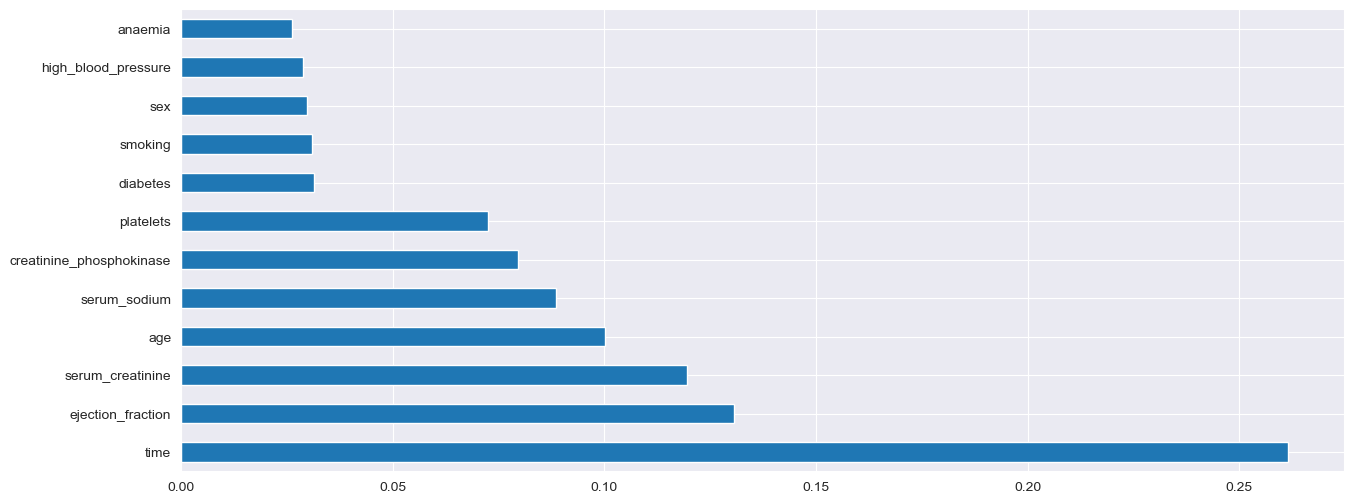

In [5]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

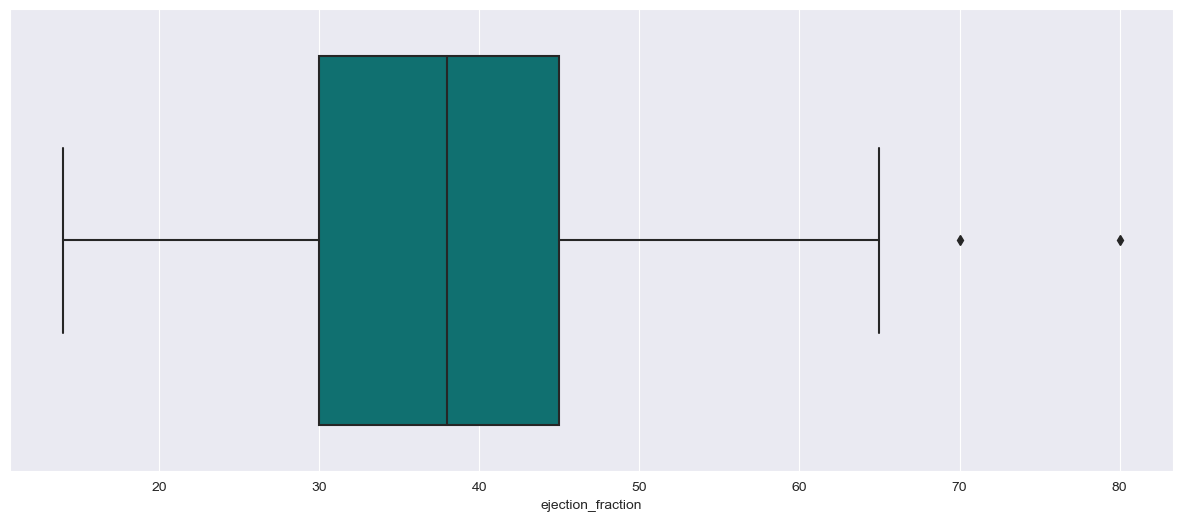

In [6]:
# Boxplot for ejection_fraction

sns.boxplot(x = dataset.ejection_fraction, color = 'teal')
plt.show()

In [7]:
# We can see there are two outliers. Lets remove them
dataset[dataset['ejection_fraction']>=70]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
64   45.0        0                       582         0                 80   
217  54.0        1                       427         0                 70   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
64                     0  263358.03              1.18           137    0   
217                    1  151000.00              9.00           137    0   

     smoking  time  DEATH_EVENT  
64         0    63            0  
217        0   196            1

In [8]:
dataset = dataset[dataset['ejection_fraction']<70]

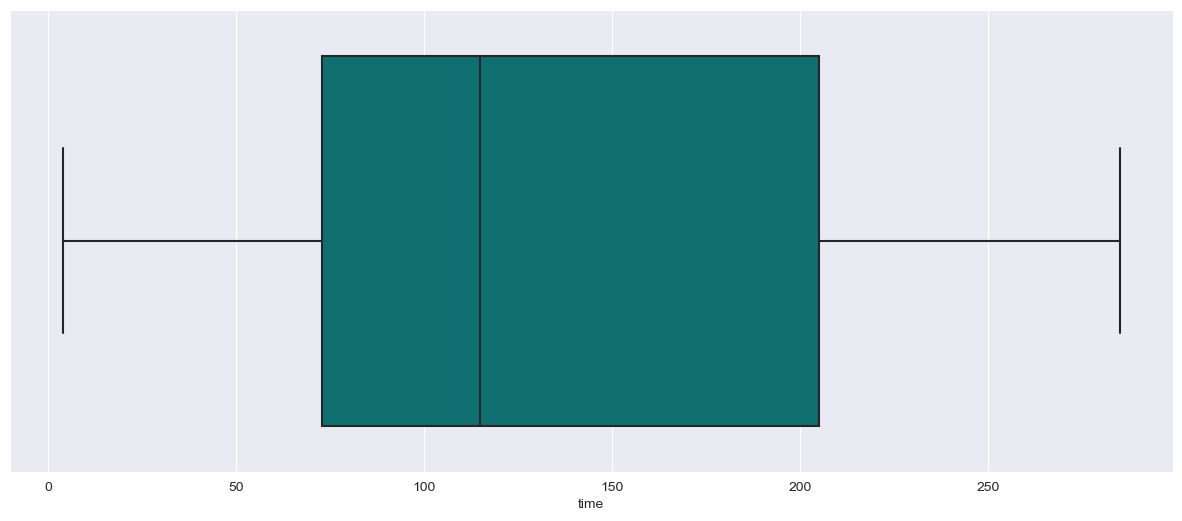

In [9]:
# Finding outliers in time
sns.boxplot(x=dataset.time, color = 'teal')
plt.show()

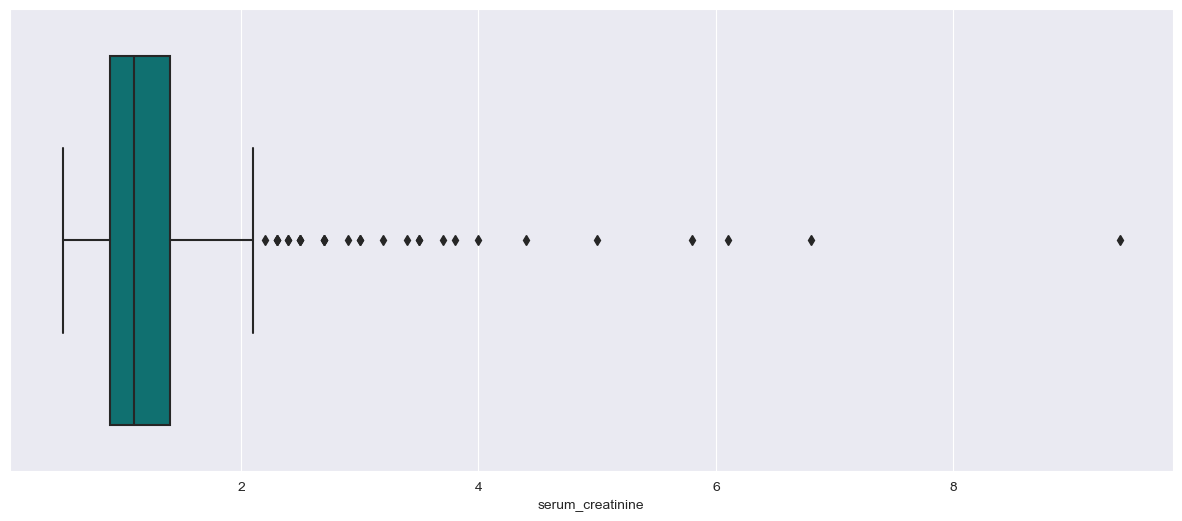

In [10]:
# Boxplot for ejection_fraction
sns.boxplot(x=dataset.serum_creatinine, color = 'teal')
plt.show()

In [12]:
# Distribution of Age

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['age'],
    xbins=dict( 
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))


fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, 
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [13]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="age", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [67]:
# Distribution of creatinine_phosphokinase

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['creatinine_phosphokinase'],
    xbins=dict( # bins used for histogram
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='CREATININE PHOSPHOKINASE DISTRIBUTION',
    xaxis_title_text='CREATININE PHOSPHOKINASE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [15]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [16]:
# Distribution of ejection_fraction

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [17]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [18]:
# Distribution of platelets

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['platelets'],
    xbins=dict( # bins used for histogram
        start=25000,
        end=300000,
        size=5000
    ),
    marker_color='#50BFE6',
    opacity=1
))

fig.update_layout(
    title_text='PLATELETS DISTRIBUTION',
    xaxis_title_text='PLATELETS',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [19]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of PLATELETS Vs DEATH_EVENT", 
                   labels={"platelets": "PLATELETS"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [20]:
# Distribution of serum_creatinine

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['serum_creatinine'],
    xbins=dict( # bins used for histogram
        start=0.5,
        end=9.4,
        size=0.2
    ),
    marker_color='#E77200',
    opacity=1
))

fig.update_layout(
    title_text='SERUM CREATININE DISTRIBUTION',
    xaxis_title_text='SERUM CREATININE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [21]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()


In [22]:
# Distribution of serum_sodium

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['serum_sodium'],
    xbins=dict( # bins used for histogram
        start=113,
        end=148,
        size=1
    ),
    marker_color='#AAF0D1',
    opacity=1
))

fig.update_layout(
    title_text='SERUM SODIUM DISTRIBUTION',
    xaxis_title_text='SERUM SODIUM',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [23]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of SERUM SODIUM Vs DEATH_EVENT", 
                   labels={"serum_sodium": "SERUM SODIUM"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["sex"]==1)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["sex"]==1)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["sex"]==0)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["sex"]==0)]
label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==1)]
d3 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==0)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==1)]
label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DIABETES DISTRIBUTION IN THE DATASET \
                  DIABETES VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [26]:
d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["anaemia"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["anaemia"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["anaemia"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["anaemia"]==1)]

label1 = ["No Anaemia","Anaemia"]
label2 = ['No Anaemia - Survived','No Anaemia - Died', "Anaemia -  Survived", "Anaemia  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ANAEMIA"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ANAEMIA VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="ANAEMIA DISTRIBUTION IN THE DATASET \
                  ANAEMIA VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='ANAEMIA', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='ANAEMIA VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [27]:
d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==1)]

label1 = ["No High BP","High BP"]
label2 = ['No High BP - Survived','No High BP - Died', "High BP -  Survived", "High BP  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="HIGH BP"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="HIGH BP VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="HIGH BP DISTRIBUTION IN THE DATASET \
                  HIGH BP VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='HIGH BP', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='HIGH BP VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [28]:
d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==1)]

label1 = ["No Smoking","Smoking"]
label2 = ['No Smoking - Survived','No Smoking - Died', "Smoking - Survived", "Smoking - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="SMOKING"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="SMOKING VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")
fig.update_layout(
    title_text="SMOKING DISTRIBUTION IN THE DATASET \
                  SMOKING VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='SMOKING', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='SMOKING VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [29]:
# "Distribution of AGE Vs DIABETES"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="diabetes", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs DIABETES", 
                   labels={"diabetes": "DIABETES", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [30]:
# "Distribution of AGE Vs ANAEMIA"
fig = px.histogram(dataset, x="age", color="anaemia", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs ANAEMIA", 
                   labels={"anaemia": "ANAEMIA", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [31]:
# "Distribution of AGE Vs HIGH BLOOD PRESSURE"
fig = px.histogram(dataset, x="age", color="high_blood_pressure", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs HIGH BLOOD PRESSURE", 
                   labels={"high_blood_pressure": "HIGH BLOOD PRESSURE", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [32]:
# "Distribution of AGE Vs SMOKING"
fig = px.histogram(dataset, x="age", color="smoking", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs SMOKING", 
                   labels={"smoking": "SMOKING", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

# Using Random Forest Classifier

# Train-Test Ratio : 80-20

In [33]:
# Splitting the dataset into training set and test set 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [34]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

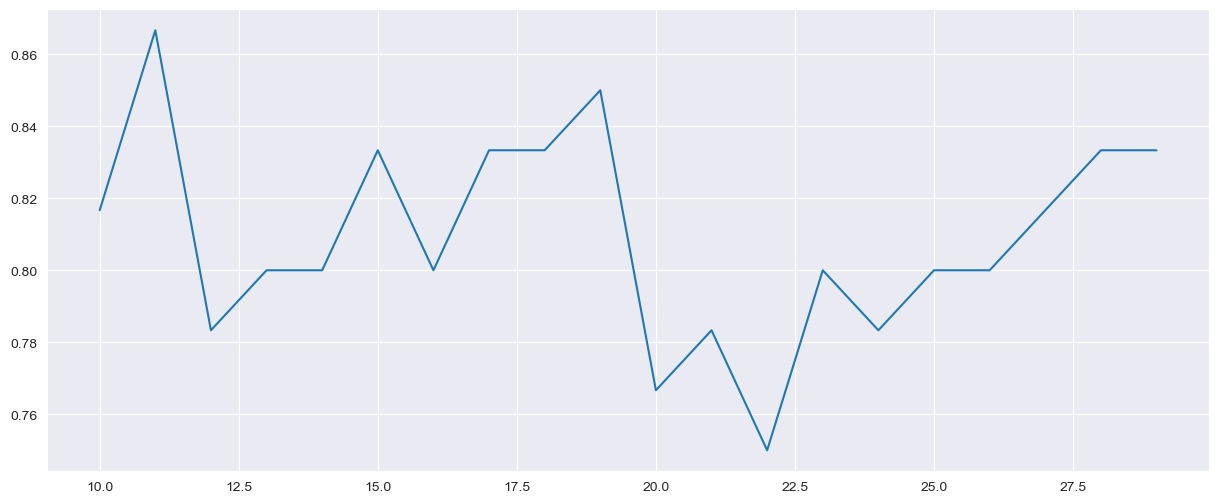

In [35]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [36]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 11, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0)

In [37]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0]


Accuracy Score 0.8666666666666667


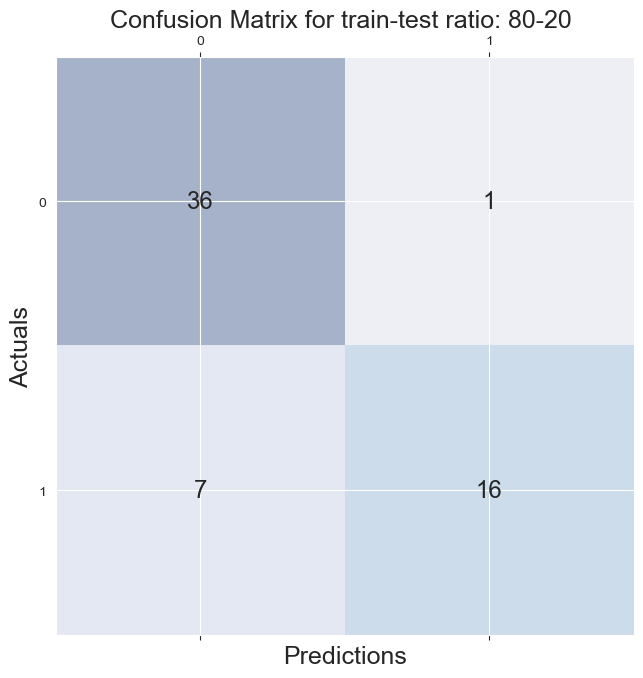

In [38]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("Accuracy Score",ac)
print("Confusion Matrix",cm)
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for train-test ratio: 80-20 ', fontsize=18)
plt.show()

In [39]:
from sklearn.metrics import matthews_corrcoef
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tn, fp, fn, tp = cm.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy1 = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision1 = tp / (tp + fp)
 
# Calculate sensitivity
sensitivity1 = tp / (tp + fn)
 
# Calculate specificity
specificity1 = tn / (tn + fp)

# Calculate False positive rate
fpr1 = fp / fp + tn

# Calculate False negative rate
fnr1 = fn / tp + fn

# Calculate Negative predictive value
npv1 = tn / tn + fn

# Calculate False discovery rate
fdr1 = fp / fp+ tp

# Calculate F1-score
f1_score1 = 2 * (precision1 * sensitivity1) / (precision1 + sensitivity1)
 
# Calculate 
mcc1 = matthews_corrcoef(y_test, y_pred)


# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy1, 2))
print("Precision: ", round(precision1, 2))
print("Sensitivity: ", round(sensitivity1, 2))
print("Specificity: ", round(specificity1, 2))
print("False Positive Rate: ", round(fpr1,2))
print("False Negative Rate: ", round(fnr1,2))
print("Negative predictive value: ", round(npv1,2))
print("False Discovery Rate: ", round(fdr1,2))
print("F1-score: ", round(f1_score1, 2))
print("Matthews Correlation Coefficient: ", round(mcc1, 2))

True Positive (TP):  16
True Negative (TN):  36
False Positive (FP):  1
False Negative (FN):  7


Metrics:
Accuracy:  0.87
Precision:  0.94
Sensitivity:  0.7
Specificity:  0.97
False Positive Rate:  37.0
False Negative Rate:  7.44
Negative predictive value:  8.0
False Discovery Rate:  17.0
F1-score:  0.8
Matthews Correlation Coefficient:  0.72


AUC: 0.834


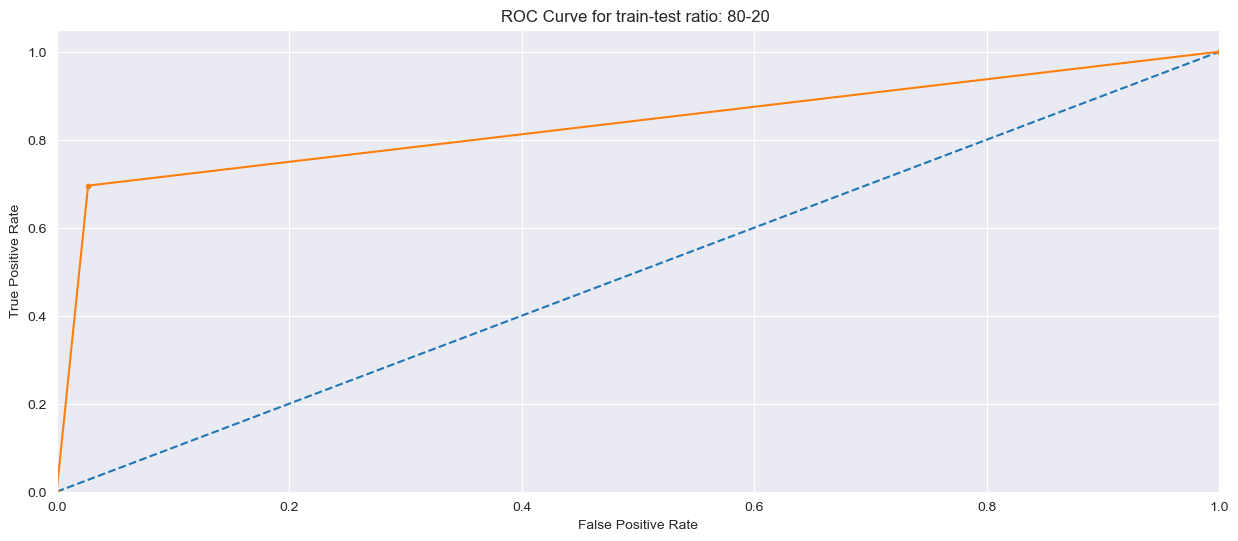

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for train-test ratio: 80-20 ')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Train-Test Ratio : 70-30

In [41]:
# Splitting the dataset into training set and test set 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =0)

In [42]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

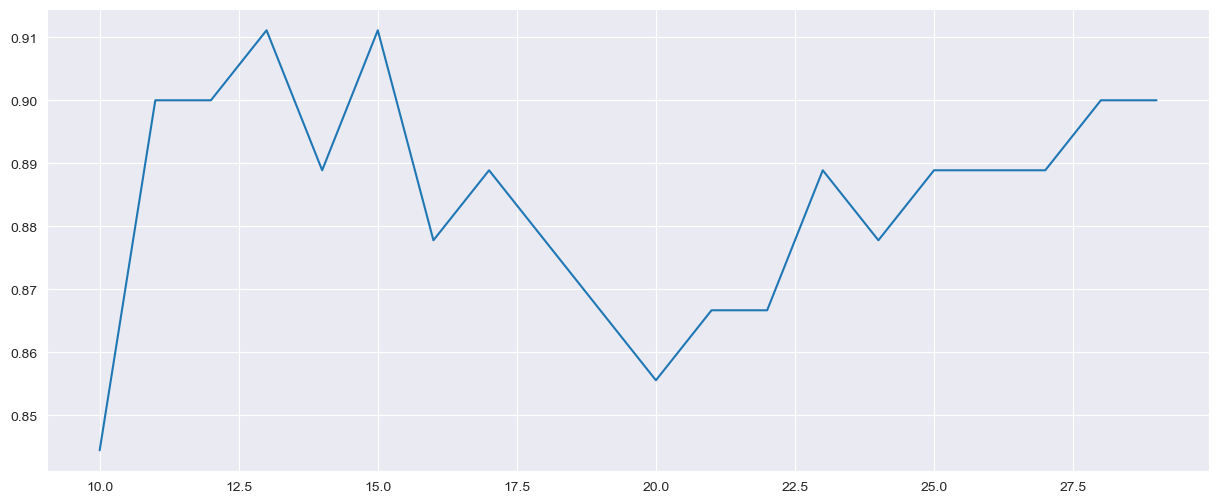

In [43]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [44]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 11, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0)

In [45]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


Accuracy Score:  0.9


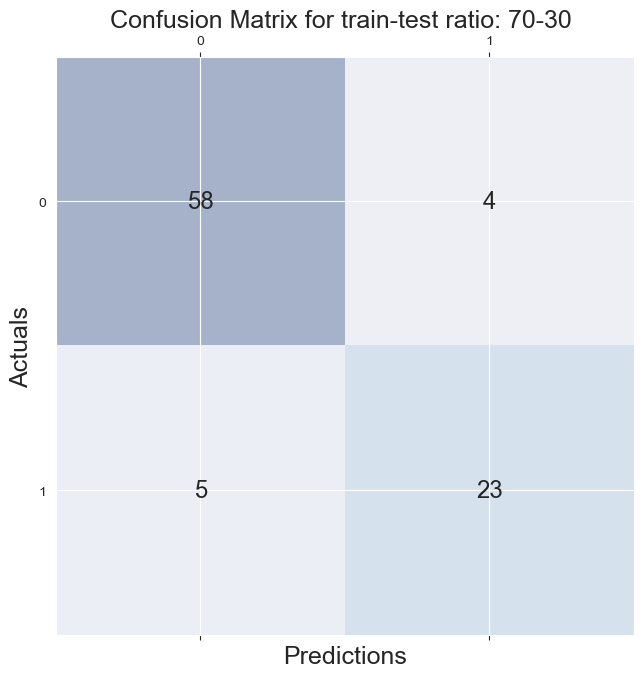

In [46]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("Accuracy Score: ",ac)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for train-test ratio: 70-30 ', fontsize=18)
plt.show()

In [47]:
from sklearn.metrics import matthews_corrcoef
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tn, fp, fn, tp = cm.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy2 = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision2 = tp / (tp + fp)
 
# Calculate sensitivity
sensitivity2 = tp / (tp + fn)
 
# Calculate specificity
specificity2 = tn / (tn + fp)

# Calculate False positive rate
fpr2 = fp / fp + tn

# Calculate False negative rate
fnr2 = fn / tp + fn

# Calculate Negative predictive value
npv2 = tn / tn + fn

# Calculate False discovery rate
fdr2 = fp / fp+ tp

# Calculate F1-score
f1_score2 = 2 * (precision2 * sensitivity2) / (precision2 + sensitivity2)
 
# Calculate 
mcc2 = matthews_corrcoef(y_test, y_pred)


# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy2, 2))
print("Precision: ", round(precision2, 2))
print("Sensitivity: ", round(sensitivity2, 2))
print("Specificity: ", round(specificity2, 2))
print("False Positive Rate: ", round(fpr2,2))
print("False Negative Rate: ", round(fnr2,2))
print("Negative predictive value: ", round(npv2,2))
print("False Discovery Rate: ", round(fdr2,2))
print("F1-score: ", round(f1_score2, 2))
print("Matthews Correlation Coefficient: ", round(mcc2, 2))

True Positive (TP):  23
True Negative (TN):  58
False Positive (FP):  4
False Negative (FN):  5


Metrics:
Accuracy:  0.9
Precision:  0.85
Sensitivity:  0.82
Specificity:  0.94
False Positive Rate:  59.0
False Negative Rate:  5.22
Negative predictive value:  6.0
False Discovery Rate:  24.0
F1-score:  0.84
Matthews Correlation Coefficient:  0.76


AUC: 0.878


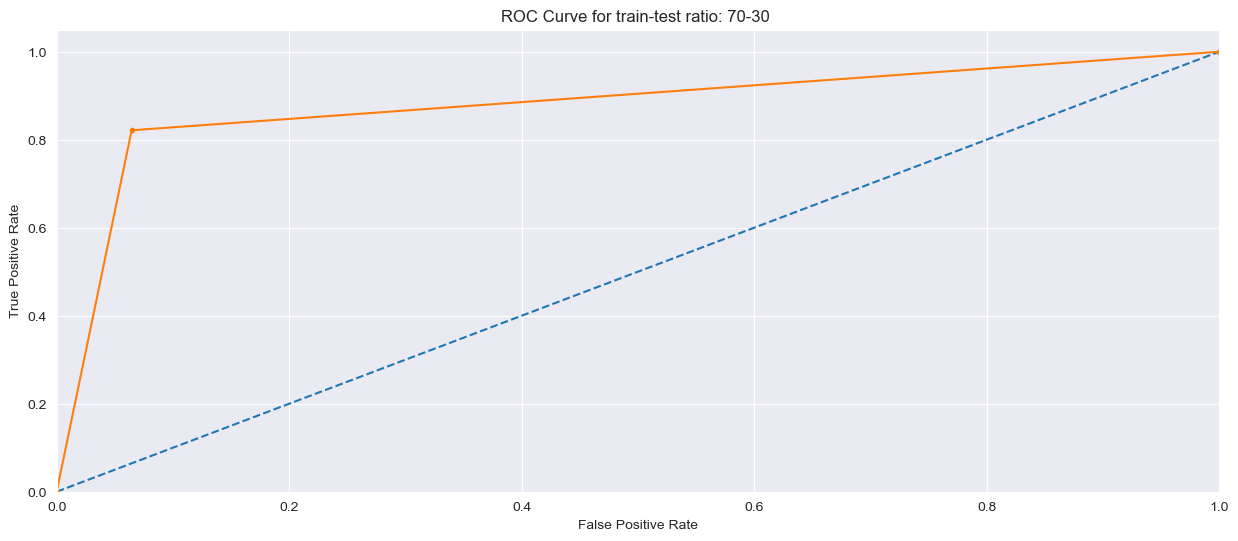

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for train-test ratio: 70-30 ')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Train-Test Ratio : 60-40

In [49]:
# Splitting the dataset into training set and test set 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state =0)

In [50]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

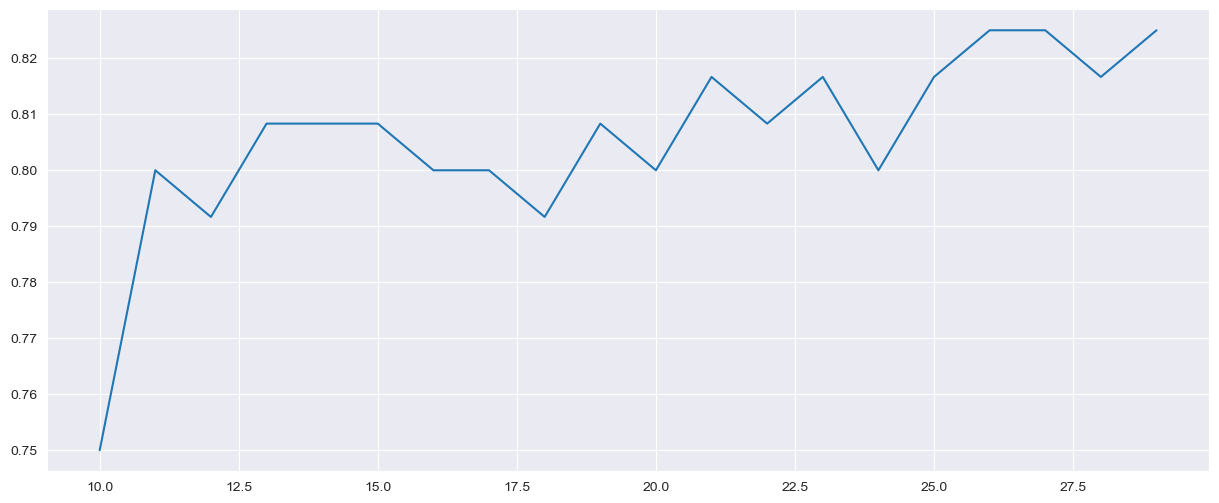

In [51]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [52]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 11, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0)

In [53]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 1]


Accuracy Score:  0.8


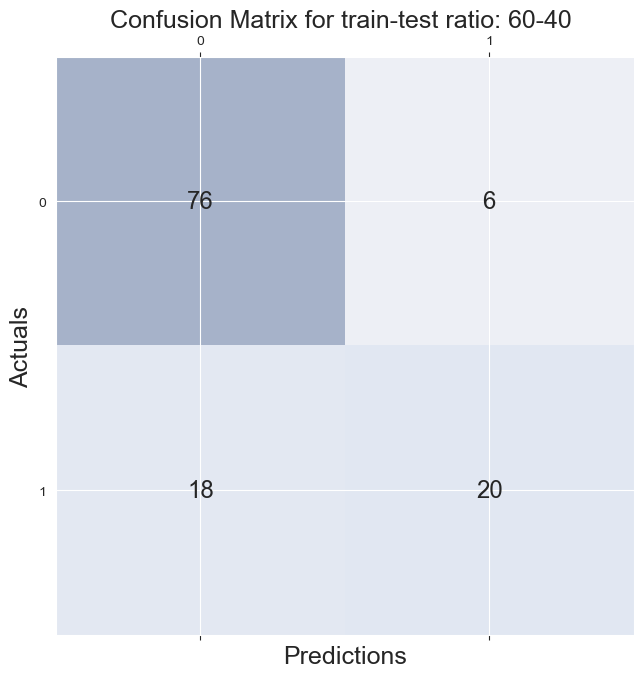

In [54]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("Accuracy Score: ",ac)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for train-test ratio: 60-40 ', fontsize=18)
plt.show()

In [55]:
from sklearn.metrics import matthews_corrcoef
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tn, fp, fn, tp = cm.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy3 = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision3 = tp / (tp + fp)
 
# Calculate sensitivity
sensitivity3 = tp / (tp + fn)
 
# Calculate specificity
specificity3 = tn / (tn + fp)

# Calculate False positive rate
fpr3 = fp / fp + tn

# Calculate False negative rate
fnr3 = fn / tp + fn

# Calculate Negative predictive value
npv3 = tn / tn + fn

# Calculate False discovery rate
fdr3 = fp / fp+ tp

# Calculate F1-score
f1_score3 = 2 * (precision3 * sensitivity3) / (precision3 + sensitivity3)
 
# Calculate 
mcc3 = matthews_corrcoef(y_test, y_pred)


# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy3, 2))
print("Precision: ", round(precision3, 2))
print("Sensitivity: ", round(sensitivity3, 2))
print("Specificity: ", round(specificity3, 2))
print("False Positive Rate: ", round(fpr3,2))
print("False Negative Rate: ", round(fnr3,2))
print("Negative predictive value: ", round(npv3,2))
print("False Discovery Rate: ", round(fdr3,2))
print("F1-score: ", round(f1_score3, 2))
print("Matthews Correlation Coefficient: ", round(mcc3, 2))

True Positive (TP):  20
True Negative (TN):  76
False Positive (FP):  6
False Negative (FN):  18


Metrics:
Accuracy:  0.8
Precision:  0.77
Sensitivity:  0.53
Specificity:  0.93
False Positive Rate:  77.0
False Negative Rate:  18.9
Negative predictive value:  19.0
False Discovery Rate:  21.0
F1-score:  0.62
Matthews Correlation Coefficient:  0.51


AUC: 0.727


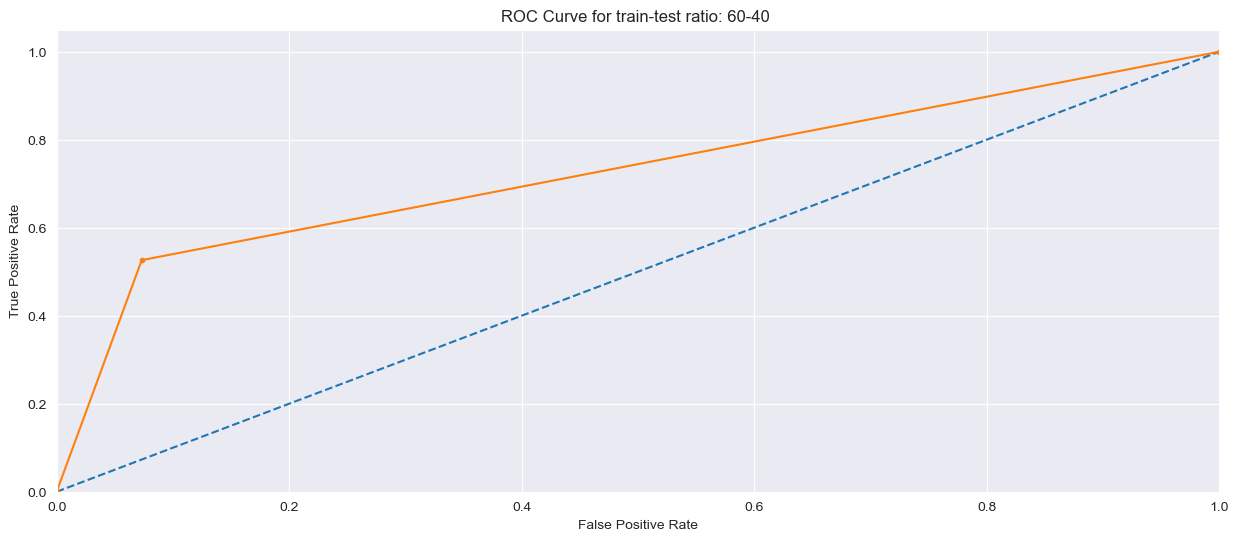

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for train-test ratio: 60-40 ')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Comparision of all metrics using bar graph

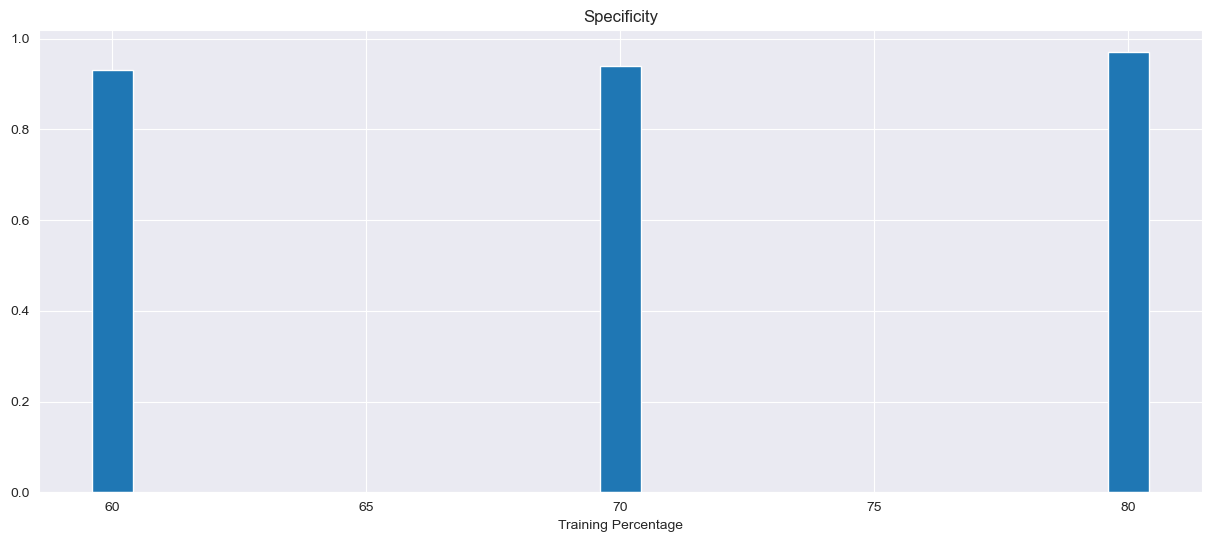

In [57]:
# Specificity
ratios = [70, 80, 60]
specificity = [0.94, 0.97, 0.93]

plt.bar(ratios, specificity)
plt.title('Specificity')
plt.xlabel('Training Percentage')
plt.show()

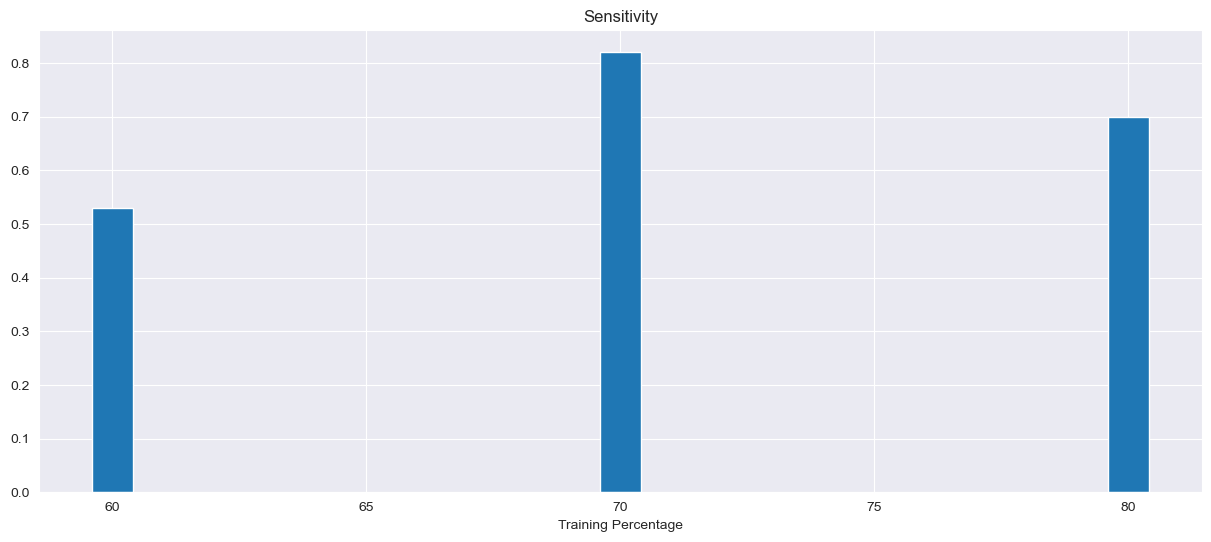

In [58]:
# Sensitivity
ratios = [70, 80, 60]
sensitivity = [0.82, 0.7, 0.53]

plt.bar(ratios, sensitivity)
plt.title('Sensitivity')
plt.xlabel('Training Percentage')
plt.show()

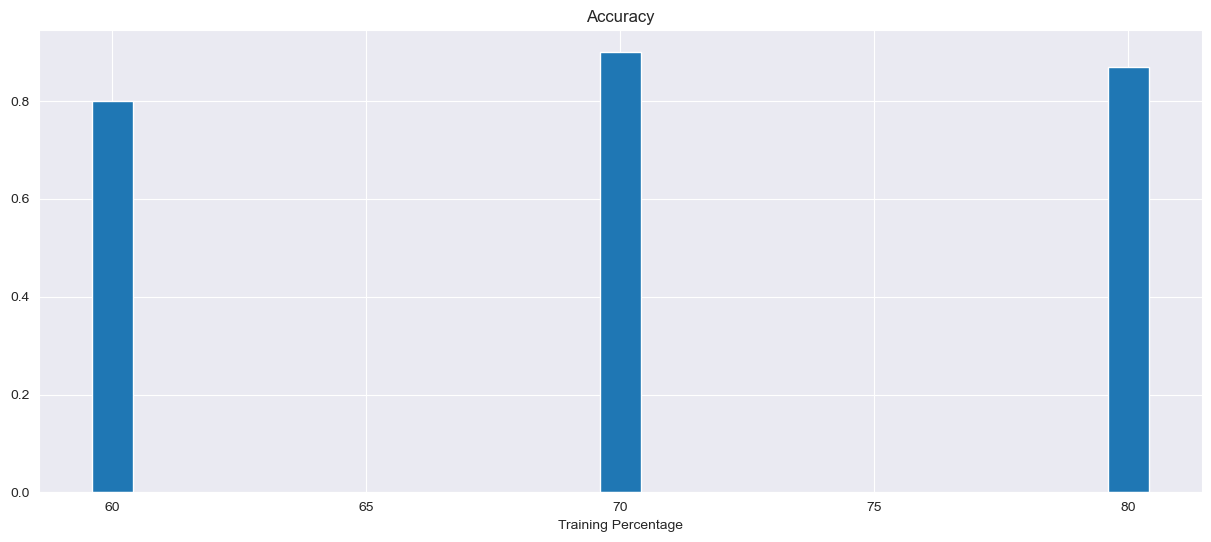

In [59]:
# Accuracy
ratios = [70, 80, 60]
accuracy = [0.9, 0.87, 0.8]

plt.bar(ratios, accuracy)
plt.title('Accuracy')
plt.xlabel('Training Percentage')
plt.show()

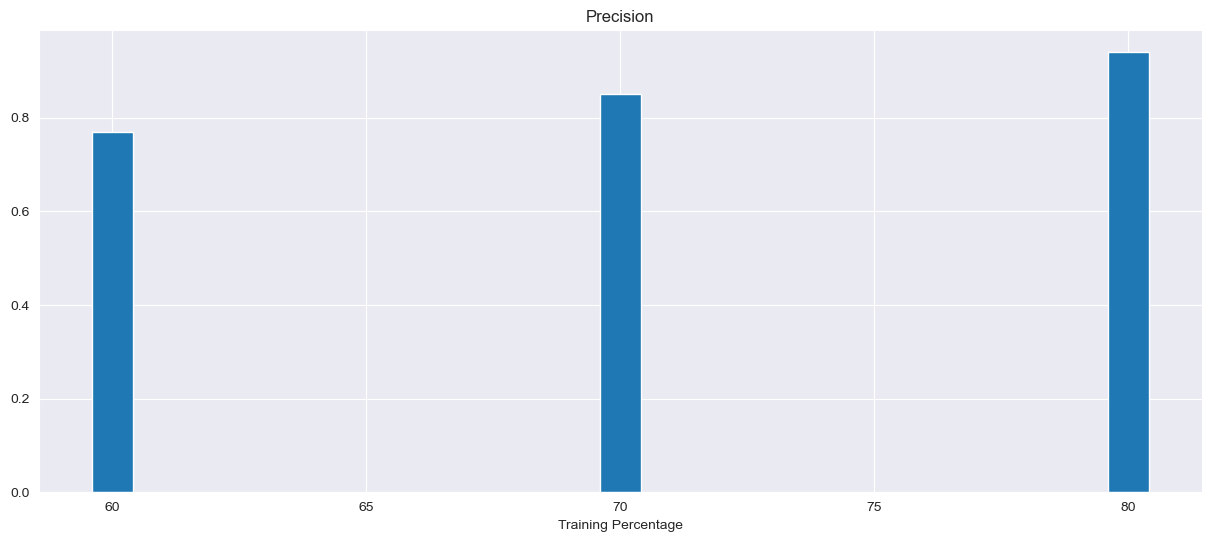

In [60]:
# Precision
ratios = [70, 80, 60]
precision = [0.85, 0.94, 0.77]

plt.bar(ratios, precision)
plt.title('Precision')
plt.xlabel('Training Percentage')
plt.show()

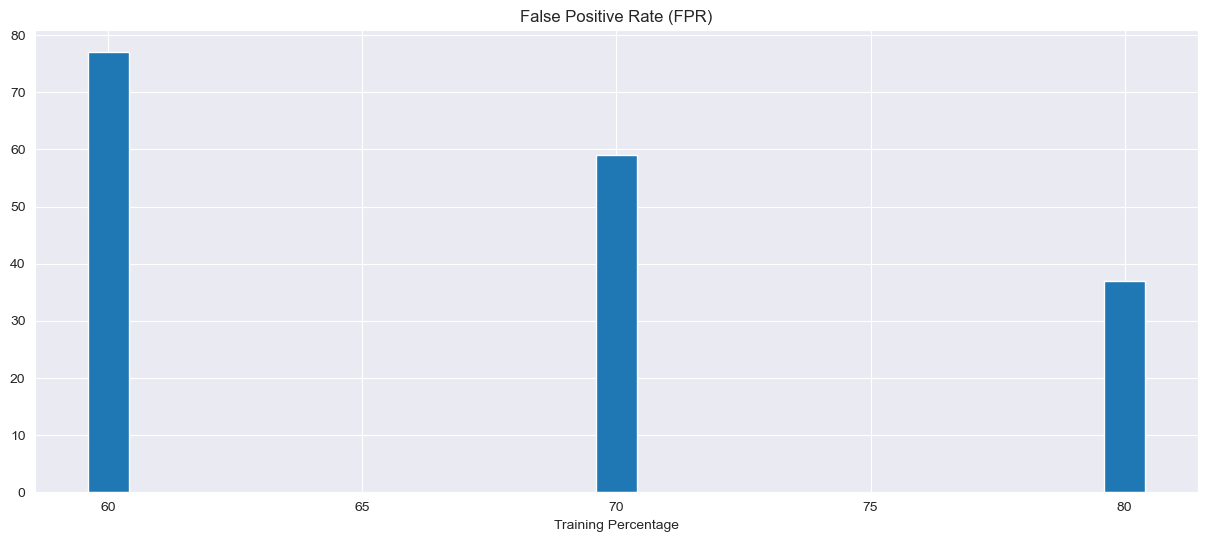

In [61]:
ratios = [70, 80, 60]
fpr = [59.0, 37.0, 77.0]

plt.bar(ratios, fpr)
plt.title('False Positive Rate (FPR)')
plt.xlabel('Training Percentage')
plt.show()

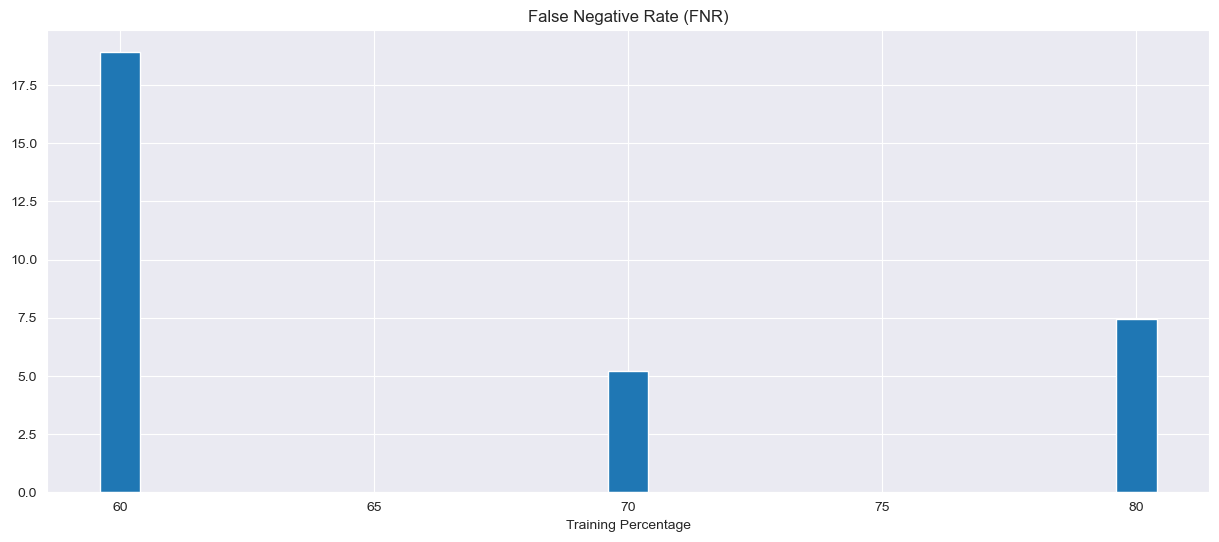

In [62]:
# False Negative Rate (FNR)
ratios = [70, 80, 60]
fnr = [5.22, 7.44, 18.9]

plt.bar(ratios, fnr)
plt.title('False Negative Rate (FNR)')
plt.xlabel('Training Percentage')
plt.show()

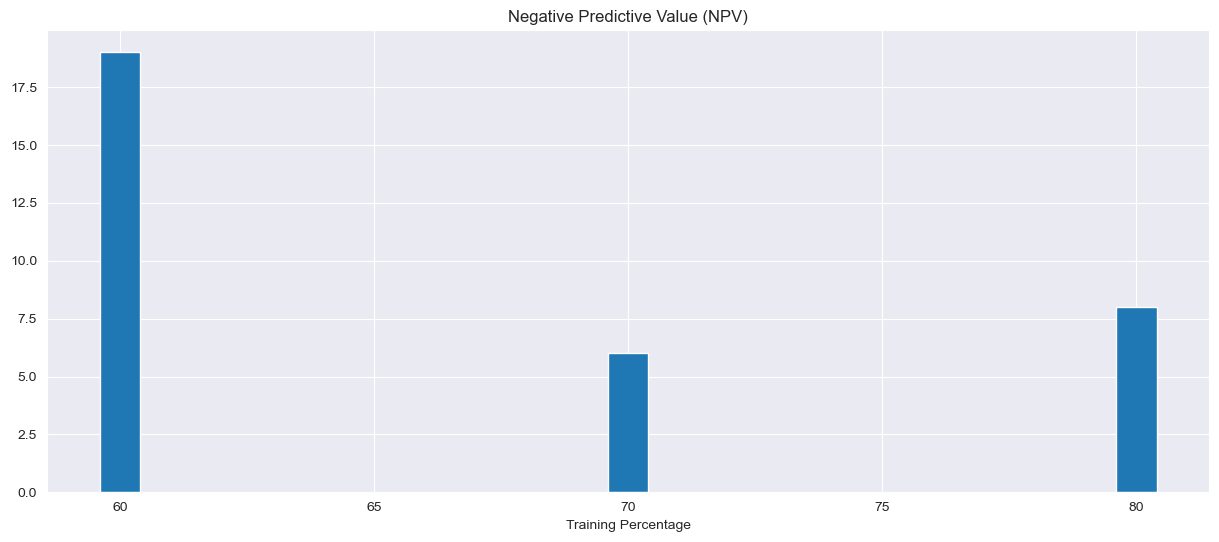

In [63]:
# Negative Predictive Value (NPV)
ratios = [70, 80, 60]
npv = [6.0, 8.0, 19.0]

plt.bar(ratios, npv)
plt.title('Negative Predictive Value (NPV)')
plt.xlabel('Training Percentage')
plt.show()

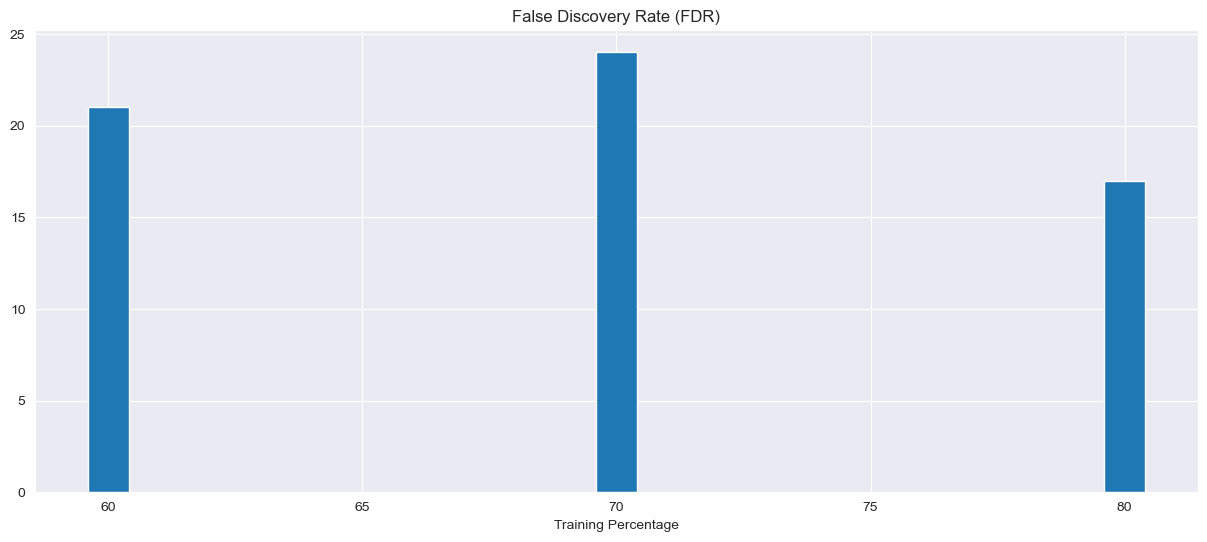

In [64]:
# False Discovery Rate (FDR)
ratios = [70, 80, 60]
fdr = [24.0, 17.0, 21.0]

plt.bar(ratios, fdr)
plt.title('False Discovery Rate (FDR)')
plt.xlabel('Training Percentage')
plt.show()

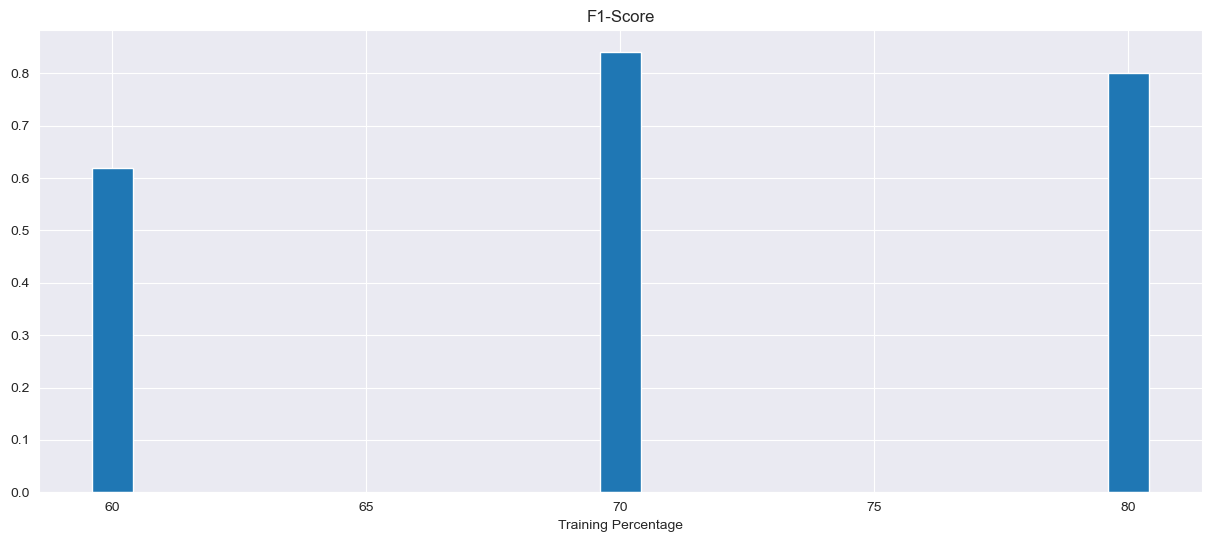

In [65]:
# F1-Score
ratios = [70, 80, 60]
f1_score = [0.84, 0.8, 0.62]

plt.bar(ratios, f1_score)
plt.title('F1-Score')
plt.xlabel('Training Percentage')
plt.show()

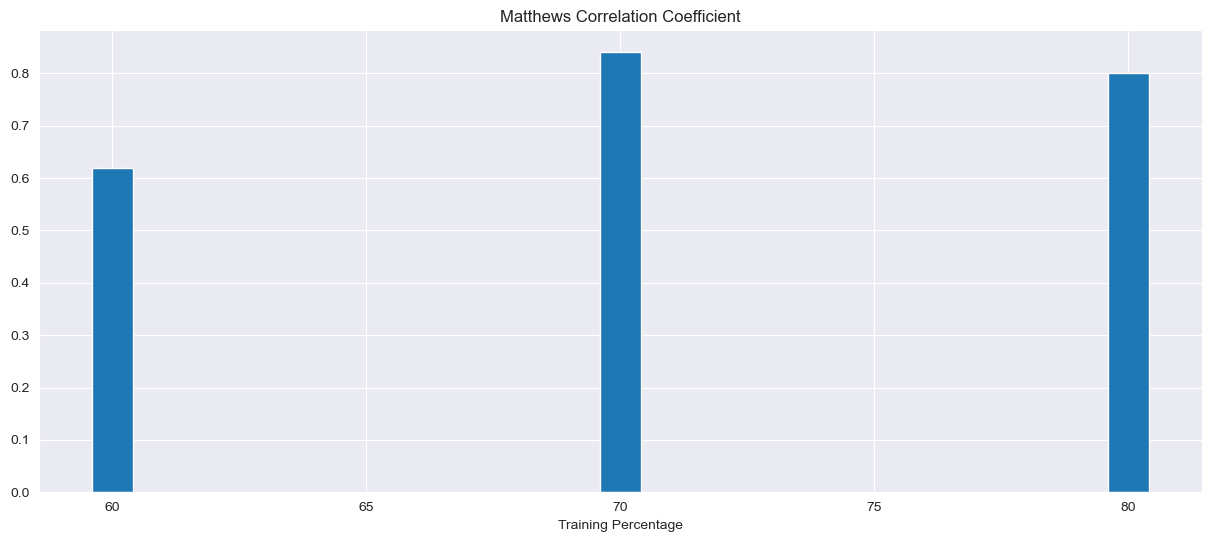

In [66]:
# Matthews Correlation Coefficient (MCC)
ratios = [70, 80, 60]
mcc = [0.76, 0.72, 0.51]
plt.bar(ratios, f1_score)
plt.title('Matthews Correlation Coefficient')
plt.xlabel('Training Percentage')
plt.show()